In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
sns.set_style('whitegrid')

In [83]:
DatabaseDF = pd.read_csv("../CleanedDataset.csv")

DatabaseDF.head()

,Unnamed: 0,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs",...,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Completion Type,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
0,0,Operator 1,Well 1,MBH,5114.0,30.0,141,99,10,0.0,...,NaN,660.0,33.55,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
1,1,Operator 2,Well 2,MBH,5181.0,NaN,142,99,16,418000.0,...,NaN,660.0,27.62,NaN,NaN,NaN,NaN,NaN,NaN,2005.0
2,2,Operator 2,Well 3,MBH,4780.0,15.0,142,99,24,568407.0,...,NaN,660.0,11.19,OH,NaN,NaN,NaN,NaN,NaN,2006.0
3,3,Operator 1,Well 4,MBH,10654.0,1.0,142,99,1,845000.0,...,NaN,660.0,27.85,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
4,4,Operator 2,Well 5,MBH,5209.0,1.0,142,99,35,297366.0,...,NaN,660.0,50.88,OH,NaN,NaN,NaN,NaN,NaN,2006.0


In [84]:
DatabaseDF.describe()

,Unnamed: 0,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs","Fluid, bbls",Best1 Mo BOPD,Best3 Mo BOPD,...,Latitude,Longitude,SPACING_CAPPED,12 month Cum Prod,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
count,10856.000000,10848.000000,10688.000000,10856.000000,10856.000000,10856.000000,1.085600e+04,10839.000000,9306.000000,9200.000000,...,10856.000000,10856.000000,10847.000000,10856.000000,4556.000000,5180.000000,17.000000,5.000000,15.000000,10848.000000
mean,5427.500000,8914.655476,27.997754,152.173729,95.914886,18.198047,3.332069e+06,69222.382305,491.904380,394.693351,...,47.995412,-102.976506,596.784559,98.421863,27.581870,28.950772,25.470588,20.000000,70.600000,2012.425608
std,3134.001595,1833.823556,10.989723,4.829458,3.479933,10.444299,2.364422e+06,58068.128933,273.763722,217.153189,...,0.420657,0.451102,110.862786,54.173541,9.879565,10.537756,10.966527,9.027735,19.393666,2.208918
min,0.000000,3.000000,1.000000,139.000000,89.000000,1.000000,0.000000e+00,0.000000,1.873767,1.873767,...,46.804382,-104.044496,18.074815,0.280000,1.000000,1.000000,1.000000,15.000000,30.000000,2004.000000
25%,2713.750000,8916.000000,22.000000,149.000000,93.000000,9.000000,1.999804e+06,34778.000000,291.157133,238.242384,...,47.759769,-103.324524,578.587387,60.917500,22.000000,24.000000,19.000000,15.000000,55.500000,2011.000000
50%,5427.500000,9427.000000,30.000000,152.000000,96.000000,18.000000,2.958260e+06,55127.000000,454.043393,362.354810,...,47.993790,-102.928989,660.000000,88.970000,30.000000,30.000000,20.000000,16.000000,78.000000,2013.000000
75%,8141.250000,9799.000000,34.000000,155.000000,99.000000,27.000000,3.879750e+06,80064.000000,640.828402,506.618453,...,48.238771,-102.617006,660.000000,124.847500,34.000000,35.000000,37.000000,18.000000,85.000000,2014.000000
max,10855.000000,22231.000000,94.000000,164.000000,105.000000,36.000000,2.874457e+07,598562.000000,2264.727153,1819.044488,...,48.994837,-102.071631,660.000000,495.810000,80.000000,89.000000,37.000000,36.000000,94.000000,2017.000000


In [85]:
spearmancorr = DatabaseDF.corr(method='spearman')
spearmancorr

,Unnamed: 0,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs","Fluid, bbls",Best1 Mo BOPD,Best3 Mo BOPD,...,Latitude,Longitude,SPACING_CAPPED,12 month Cum Prod,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
Unnamed: 0,1.000000,0.077660,0.232800,0.381223,0.006677,-0.049775,0.243052,0.198040,0.127087,0.129392,...,0.385105,-0.044463,-0.118379,0.145759,0.203367,0.178904,-0.575608,0.666886,0.176944,0.184971
Lateral Length,0.077660,1.000000,0.435665,0.018391,0.181624,-0.030477,0.326196,0.307917,0.141420,0.142319,...,0.021630,-0.185652,-0.184828,0.177257,0.405629,0.424934,0.028158,0.872082,0.480787,0.312223
Stages,0.232800,0.435665,1.000000,0.052379,0.162301,0.029076,0.658696,0.630845,0.251405,0.244439,...,0.050454,-0.171085,-0.291524,0.340166,0.908350,0.877969,0.301994,0.229416,1.000000,0.648229
Township,0.381223,0.018391,0.052379,1.000000,-0.018511,0.025329,0.010163,-0.021137,-0.174974,-0.165998,...,0.997491,-0.123387,0.036315,-0.165085,0.104709,0.022196,-0.688001,0.666886,-0.172964,-0.039493
Range,0.006677,0.181624,0.162301,-0.018511,1.000000,-0.020666,0.133176,0.274213,-0.121818,-0.144633,...,-0.014452,-0.983496,-0.020250,-0.157996,0.138849,0.162309,0.449071,0.648886,0.164849,0.167011
Section,-0.049775,-0.030477,0.029076,0.025329,-0.020666,1.000000,0.025029,0.021621,0.018478,0.016098,...,-0.036515,0.017142,-0.017271,0.010521,0.039962,0.009927,0.319731,-0.205196,0.008116,0.032135
"Total Prop, lbs",0.243052,0.326196,0.658696,0.010163,0.133176,0.025029,1.000000,0.856374,0.320731,0.331295,...,0.008453,-0.136473,-0.279404,0.440060,0.529296,0.615773,0.424671,0.564288,-0.151921,0.611360
"Fluid, bbls",0.198040,0.307917,0.630845,-0.021137,0.274213,0.021621,0.856374,1.000000,0.282209,0.291956,...,-0.022095,-0.272063,-0.289765,0.401960,0.507377,0.629173,0.680200,-0.205196,-0.066131,0.649717
Best1 Mo BOPD,0.127087,0.141420,0.251405,-0.174974,-0.121818,0.018478,0.320731,0.282209,1.000000,0.970644,...,-0.177390,0.139445,-0.220560,0.891192,0.184210,0.188430,0.204660,-0.820783,0.495085,0.206711
Best3 Mo BOPD,0.129392,0.142319,0.244439,-0.165998,-0.144633,0.016098,0.331295,0.291956,0.970644,1.000000,...,-0.168382,0.161616,-0.225671,0.937187,0.160880,0.202089,0.214894,-0.666886,0.443253,0.206136


## Defintion

Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models.


Monte Carlo simulation can be used to tackle a range of problems in virtually every field such as finance, engineering, supply chain, and science.


Monte Carlo simulation is also referred to as multiple probability simulation. (Investopedia)

They are used to estimate the probability of cost overruns in large projects and the likelihood that an asset price will move in a certain way

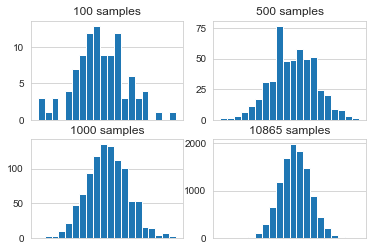

In [86]:
from numpy.random import normal
from matplotlib import pyplot as plt

mu = 98.4
sigma = 54.17
# generate monte carlo samples of differing size
sizes = [100, 500, 1000, 10865]
for i in range(len(sizes)):
	# generate sample
	sample = normal(mu, sigma, sizes[i])
	# plot histogram of sample
	plt.subplot(2, 2, i+1)
	plt.hist(sample, bins=20)
	plt.title('%d samples' % sizes[i])
	plt.xticks([])
# show the plot
plt.show()

In [101]:
log_returns = np.log(1 + DatabaseDF['12 month Cum Prod'].pct_change())

In [102]:
u = log_returns.mean()

var = log_returns.var()

stdev = log_returns.std()

In [103]:
drift = u - (0.5 * var)

In [104]:
t_intervals = 100

iterations = 18

In [105]:
from scipy.stats import norm
Z = norm.ppf(np.random.rand(t_intervals, iterations))

In [106]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

In [93]:
DatabaseDF = DatabaseDF.drop(['Operator', 'Well Name', 'Formation', 'Fluid Type from DI', 'Completion Type', 'Sleeves', 'P&P', 'Date Fracd','CT', 'Repeater Ports', 'Frac Ports'], axis=1)

In [94]:
DatabaseDF = DatabaseDF.drop(['Compl. Type'], axis=1)

In [107]:
S0 = DatabaseDF['12 month Cum Prod'].iloc[-1]

price_list = np.zeros_like(daily_returns)

price_list[0] = S0

In [108]:
for t in range(1, t_intervals):

    price_list[t] = price_list[t - 1] * daily_returns[t]

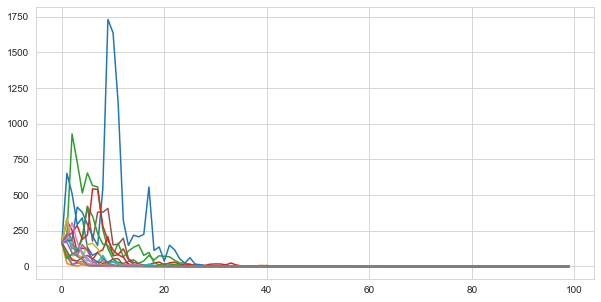

In [109]:
plt.figure(figsize=(10,5))

plt.plot(price_list)

In [123]:
PI = 3.1415926
e = 2.71828
import random
import math

In [124]:
def get_rand_number(min_value, max_value):
    """
    This functions gets a random number from a uniform distribution between
    the two input values [min_value, max_value] inclusively
    Args:
    - min_value (float)
    - max_value (float)
    Return:
    - Random number between this range (float)
    """
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range*choice

In [125]:
# lets also define the function we want to integrate over f(x)

def f_of_x(x):
    """
    This is the main function we want to integrate over.
    Args:
    - x (float) : input to function; must be in radians
    Return:
    - output of function f(x) (float)
    """
    return (e**(-1*x))/(1+(x-1)**2)

In [126]:
def crude_monte_carlo(num_samples=10856):
    """
    This function performs the Crude Monte Carlo for our
    specific function f(x) on the range x=0 to x=5.
    Notice that this bound is sufficient because f(x)
    approaches 0 at around PI.
    Args:
    - num_samples (float) : number of samples
    Return:
    - Crude Monte Carlo estimation (float)
    
    """
    lower_bound = DatabaseDF['12 month Cum Prod'].min()
    upper_bound = DatabaseDF['12 month Cum Prod'].max()
    
    sum_of_samples = 0
    for i in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f_of_x(x)
    
    return (upper_bound - lower_bound) * float(sum_of_samples/num_samples)

In [127]:
def get_crude_MC_variance(num_samples):
    """
    This function returns the variance fo the Crude Monte Carlo.
    Note that the inputed number of samples does not neccissarily
    need to correspond to number of samples used in the Monte
    Carlo Simulation.
    Args:
    - num_samples (int)
    Return:
    - Variance for Crude Monte Carlo approximation of f(x) (float)
    """
    int_max = 5 # this is the max of our integration range
    
    # get the average of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)**2
    sum_of_sqs = running_total*int_max / num_samples
    
    # get square of average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total = f_of_x(x)
    sq_ave = (int_max*running_total/num_samples)**2
    
    return sum_of_sqs - sq_ave

In [130]:
# Now we will run a Crude Monte Carlo simulation with 10000 samples
# We will also calculate the variance with 10000 samples and the error

MC_samples = 10856
var_samples = 10856 # number of samples we will use to calculate the variance
crude_estimation = crude_monte_carlo(MC_samples)
variance = get_crude_MC_variance(var_samples)
error = math.sqrt(variance/MC_samples)

# display results
print(f"Monte Carlo Approximation of f(x): {crude_estimation}")
print(f"Error in Approximation: {error}")

Monte Carlo Approximation of f(x): 0.6431853354937827
Error in Approximation: 0.005000764834682975
